In [29]:
from tensorflow import keras
from keras.layers import Conv2D, Dense, Dropout, Flatten
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import MaxPooling2D, GlobalMaxPooling2D
from matplotlib import pyplot as plt
from keras import datasets
from keras.utils.np_utils import to_categorical
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

In [30]:
# Load CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = keras.datasets.cifar10.load_data()

In [31]:
# Define the labels of the dataset
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
          'dog', 'frog', 'horse', 'ship', 'truck']

C:\Users\MongkolChut\AppData\Local\Temp\ipykernel_18864\3558592864.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  label_index = int(train_labels[index])


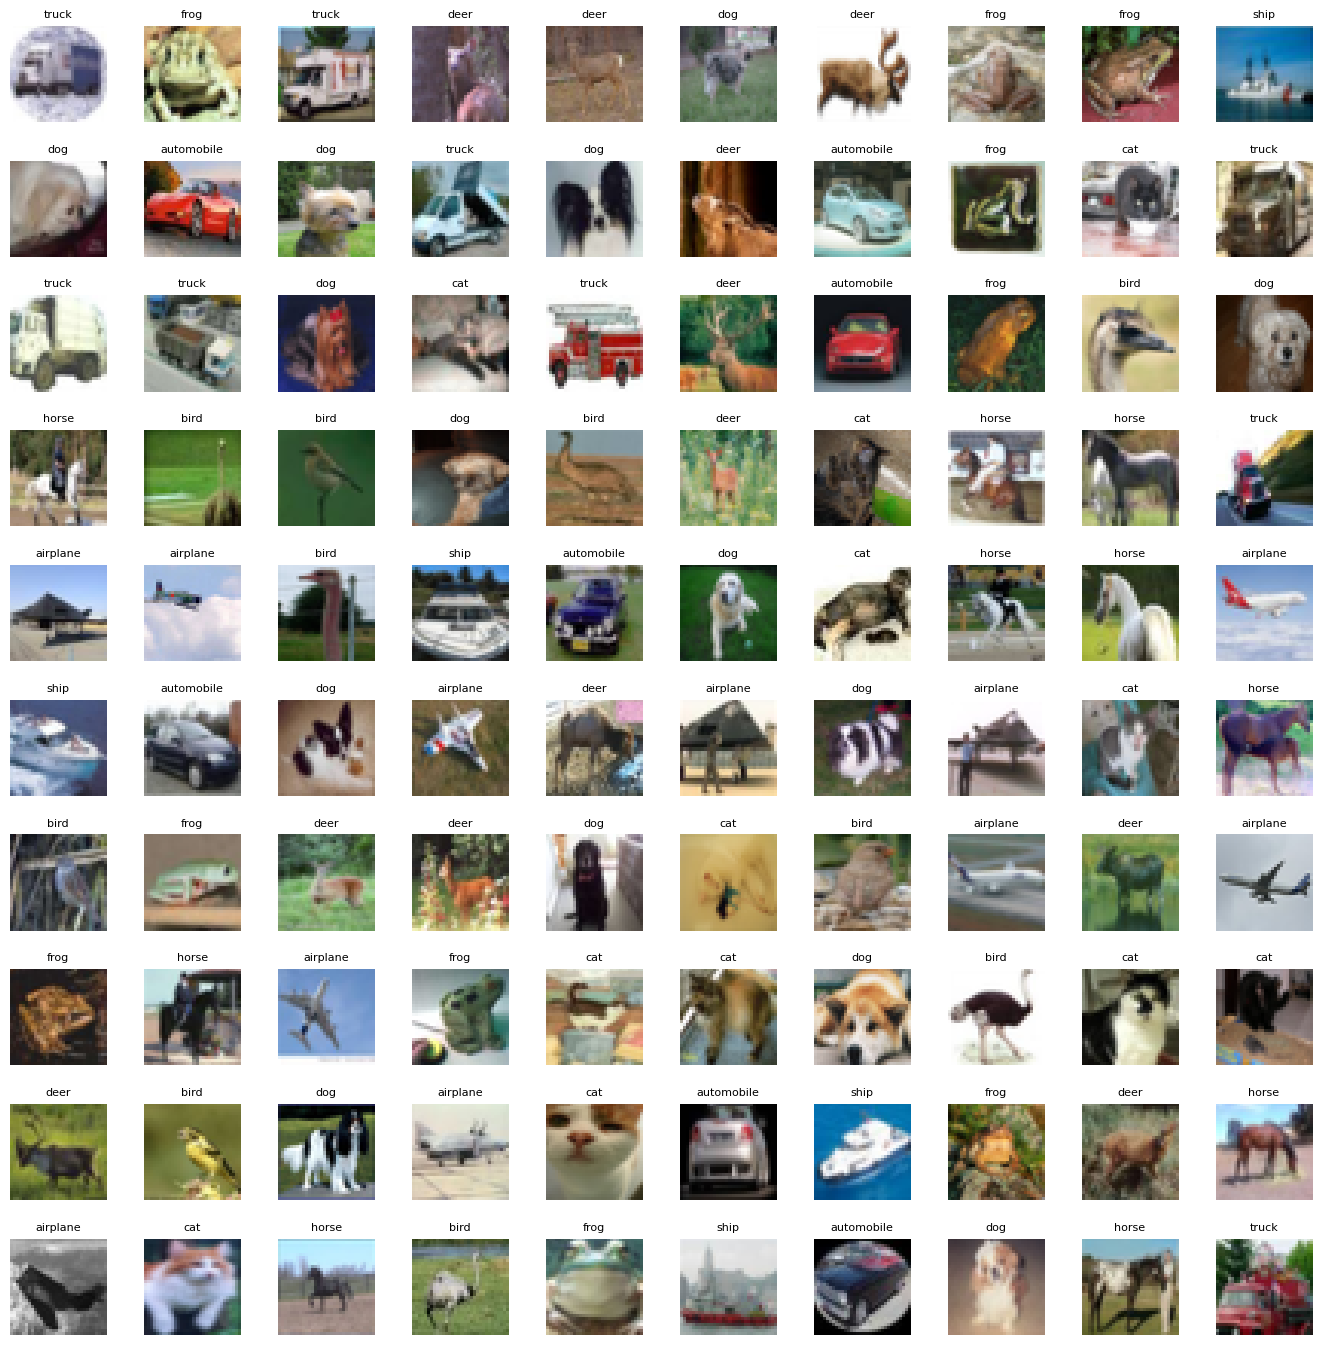

In [32]:
# Let's view more images in a grid format
# Define the dimensions of the plot grid 
W_grid = 10
L_grid = 10

fig, axes = plt.subplots(L_grid, W_grid, figsize=(17,17))
axes = axes.ravel() # Flatten the 10 x 10 matrix into 100 array
n_train = len(train_images) # Get the length of the train dataset

# Select a random number from 0 to n_train
for i in np.arange(0, W_grid * L_grid): # Create evenly spaced variables 
    index = np.random.randint(0, n_train) # Select a random number
    axes[i].imshow(train_images[index]) # Read and display an image with the selected index    
    label_index = int(train_labels[index])
    axes[i].set_title(labels[label_index], fontsize=8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

In [33]:
# Normalize the images
train_images, test_images = train_images / 255.0, test_images / 255.0

In [34]:
# Load pre-trained VGG16 model + higher level layers
from keras.applications.vgg16 import VGG16

IMG_SHAPE = (32, 32, 3)
base_model = VGG16(
    input_shape=IMG_SHAPE,
    include_top=False,
    weights='imagenet'
)

# Freeze the pre-trained model weights
base_model.trainable = True

for layer in base_model.layers[:15]:
    layer.trainable = False

# Trainable classification head
maxpool_layer = GlobalMaxPooling2D()
prediction_layer = Dense(units=10, activation='softmax')
# Layer classification head with feature detector
model = Sequential([
    base_model,
    maxpool_layer,
    prediction_layer
])

# Compile the model
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=['accuracy'])


In [35]:
# Print model summary
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 global_max_pooling2d_3 (Glo  (None, 512)              0         
 balMaxPooling2D)                                                
                                                                 
 dense_3 (Dense)             (None, 10)                5130      
                                                                 
Total params: 14,719,818
Trainable params: 7,084,554
Non-trainable params: 7,635,264
_________________________________________________________________


In [36]:
# Train the model
hist = model.fit(train_images, train_labels, epochs=20, validation_data=(test_images, test_labels))

Epoch 1/20
1563/1563 [==============================] - 22s 14ms/step - loss: 1.2111 - accuracy: 0.5647 - val_loss: 0.9296 - val_accuracy: 0.6788
Epoch 2/20
1563/1563 [==============================] - 22s 14ms/step - loss: 0.8111 - accuracy: 0.7218 - val_loss: 0.8598 - val_accuracy: 0.7032
Epoch 3/20
1563/1563 [==============================] - 22s 14ms/step - loss: 0.7175 - accuracy: 0.7525 - val_loss: 0.8033 - val_accuracy: 0.7344
Epoch 4/20
1563/1563 [==============================] - 23s 15ms/step - loss: 0.6476 - accuracy: 0.7743 - val_loss: 0.8091 - val_accuracy: 0.7278
Epoch 5/20
1563/1563 [==============================] - 25s 16ms/step - loss: 0.5908 - accuracy: 0.7937 - val_loss: 0.8378 - val_accuracy: 0.7281
Epoch 6/20
1563/1563 [==============================] - 24s 16ms/step - loss: 0.5376 - accuracy: 0.8124 - val_loss: 0.9153 - val_accuracy: 0.7220
Epoch 7/20
1563/1563 [==============================] - 25s 16ms/step - loss: 0.4904 - accuracy: 0.8260 - val_loss: 0.8604 -

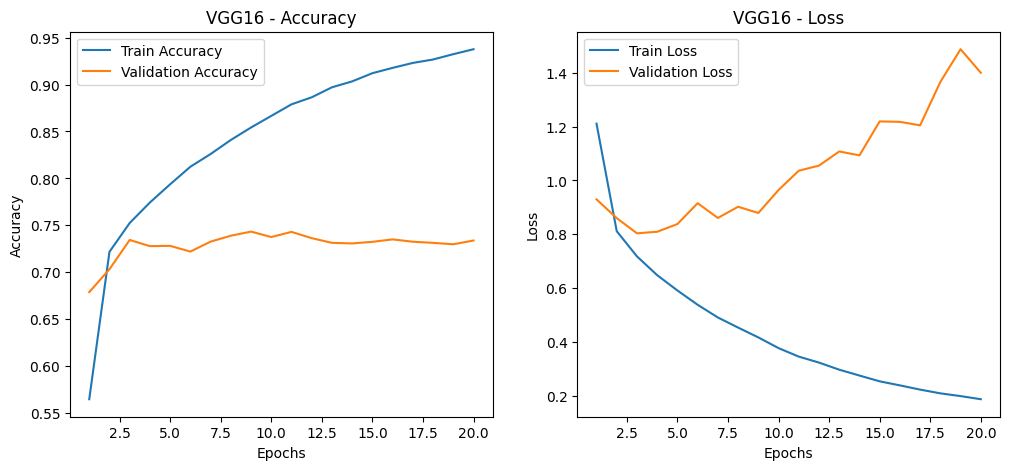

In [37]:
# Function to plot learning curves
def plot_learning_curves(history, model_name):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs_range = range(1, len(acc) + 1)
    
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Train Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title(f'{model_name} - Accuracy')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Train Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f'{model_name} - Loss')
    plt.legend()
    
    plt.show()

# Plot learning curves for VGG16 model
plot_learning_curves(hist, 'VGG16')

In [38]:
# Function to plot confusion matrix
def plot_confusion_matrix(cm, class_names, title='Confusion Matrix'):
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.title(title)
    plt.ylabel('Actual Labels')
    plt.xlabel('Predicted Labels')
    plt.show()


313/313 [==============================] - 3s 9ms/step
VGG16 Model Performance:
              precision    recall  f1-score   support

    airplane       0.79      0.79      0.79      1000
  automobile       0.83      0.84      0.83      1000
        bird       0.71      0.67      0.69      1000
         cat       0.52      0.58      0.55      1000
        deer       0.63      0.76      0.69      1000
         dog       0.66      0.60      0.63      1000
        frog       0.86      0.67      0.75      1000
       horse       0.76      0.83      0.79      1000
        ship       0.88      0.82      0.85      1000
       truck       0.79      0.79      0.79      1000

    accuracy                           0.73     10000
   macro avg       0.74      0.73      0.74     10000
weighted avg       0.74      0.73      0.74     10000



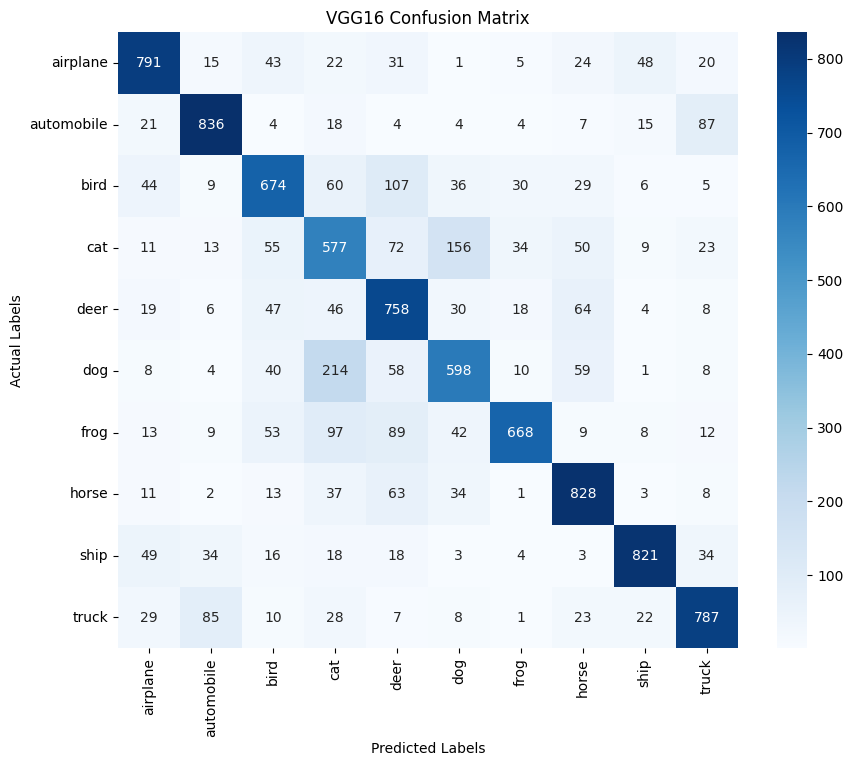

In [39]:
# Function to evaluate model and plot confusion matrix
def evaluate_model(model, x_test, y_test, model_name):
    preds = model.predict(x_test)
    preds_classes = np.argmax(preds, axis=1)
    y_test_classes = y_test.flatten()

    conf_matrix = confusion_matrix(y_test_classes, preds_classes)
    print(f"{model_name} Model Performance:")
    print(classification_report(y_test_classes, preds_classes, target_names=labels))
    
    plot_confusion_matrix(conf_matrix, class_names=labels, title=f'{model_name} Confusion Matrix')

# Evaluate VGG16 model
evaluate_model(model, test_images, test_labels, 'VGG16')